In [7]:
import numpy as np
import pandas as pd
from collections import defaultdict
import glob

def read_params(path):
    params = pd.read_csv(path, header=None, sep=" ", index_col=False, lineterminator='\n')
    params.rename(columns={0:'img_name'}, inplace=True)
    params = params.set_index('img_name').T.to_dict('list')
    return params

def swap_key(params):
    params_s = defaultdict(dict)
    for params_name, v in params.items():
        for img_name, params_value in v.items():
            params_s[img_name][params_name] = np.array(params_value).astype(np.float64)

    return params_s

def load_params(path, params_key):
    '''
    Load & Return the params
    Input : 
    :params path: path of the pre-computed parameters
    :params params_key: list of parameters name e.g. ['pose', 'light']
    Return :
    :params params_s: the dict-like of {'0.jpg':}
    '''

    params = {}
    for k in params_key:
        for p in glob.glob(f'{path}/*{k}-anno.txt'):
            # Params
            if k in p:
                print(f'Key=> {k} : Filename=>{p}')
                params[k] = read_params(path=p)

    params_s = swap_key(params)

    all_params = []
    for img_name in params_s:
        each_img = []
        for k in params_key:
            each_img.append(params_s[img_name][k])
        all_params.append(np.concatenate(each_img))
    all_params = np.stack(all_params, axis=0)
    return params_s, all_params

# Light

In [24]:
train_light = '/data/mint/DPM_Dataset/generated_dataset_80perc/params/train/'
train_light_dict, train_light_arr = load_params(train_light, ['light'])
test_light = '/data/mint/DPM_Dataset/ffhq_256_with_anno/params/valid/'
test_light_dict, test_light_arr = load_params(test_light, ['light'])

Key=> light : Filename=>/data/mint/DPM_Dataset/generated_dataset_80perc/params/train/ffhq-train-light-anno.txt
Key=> light : Filename=>/data/mint/DPM_Dataset/ffhq_256_with_anno/params/valid/ffhq-valid-light-anno.txt


(45129, 27)
(10000, 27)
(3, 27)


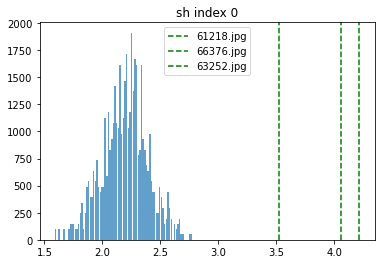

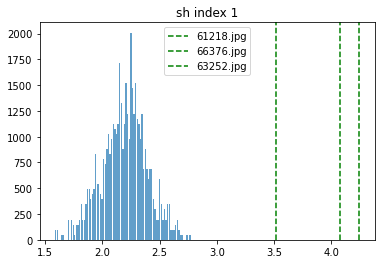

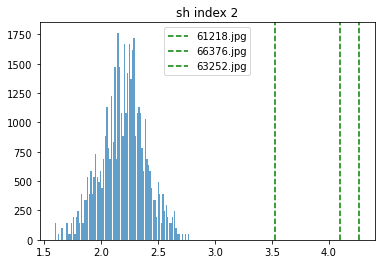

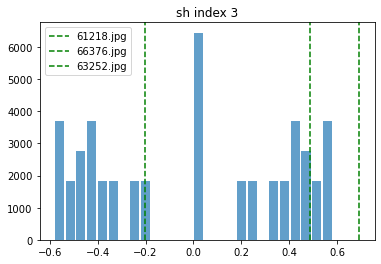

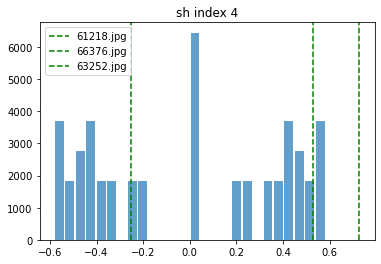

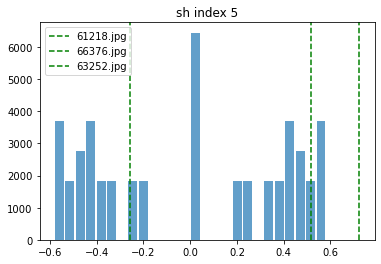

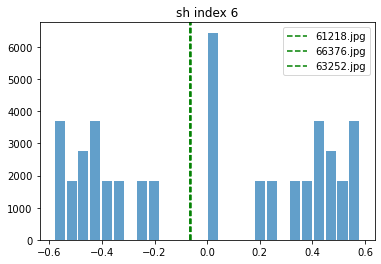

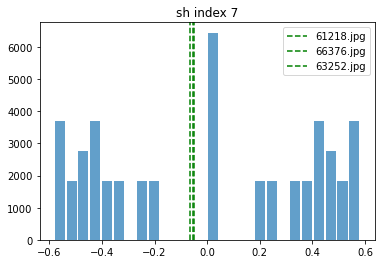

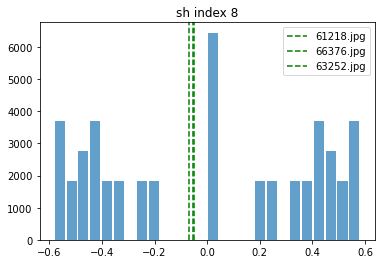

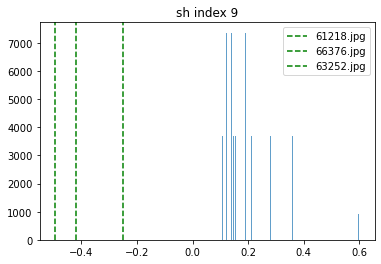

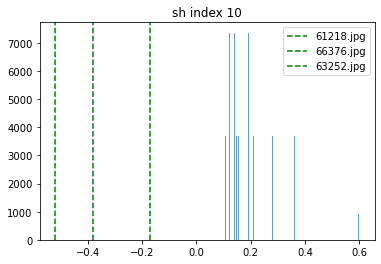

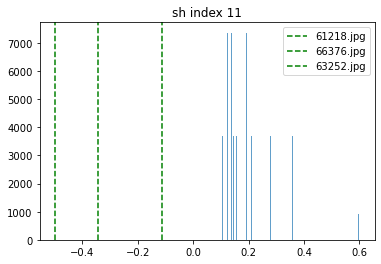

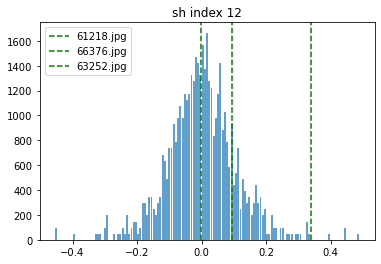

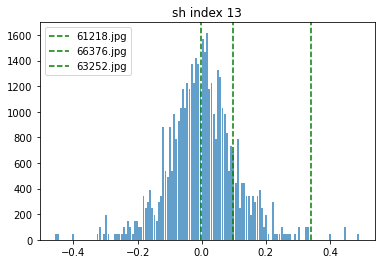

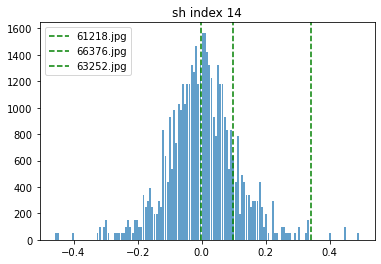

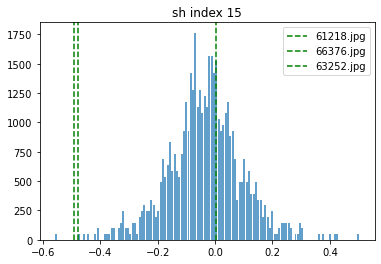

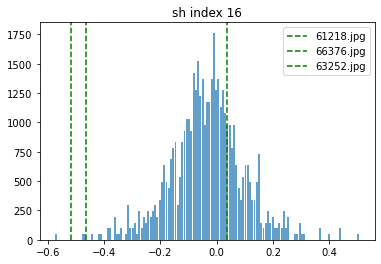

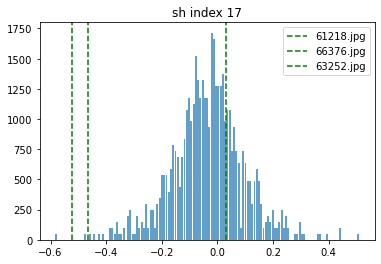

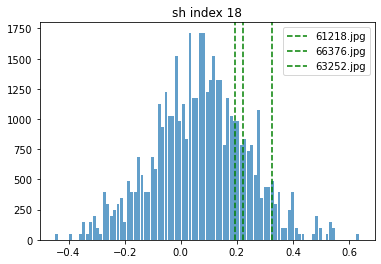

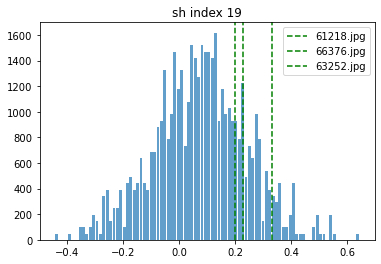

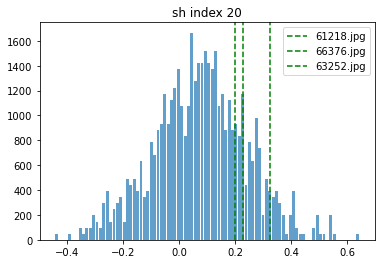

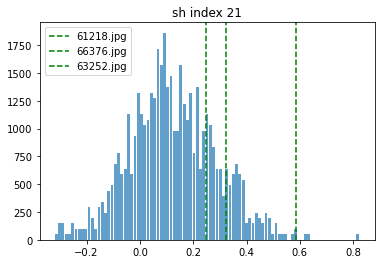

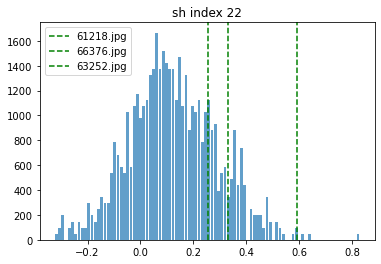

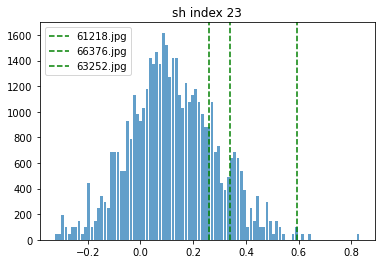

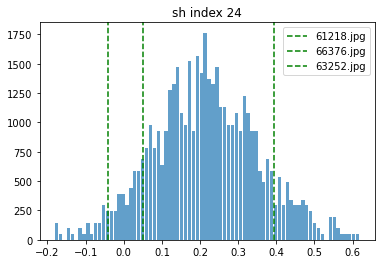

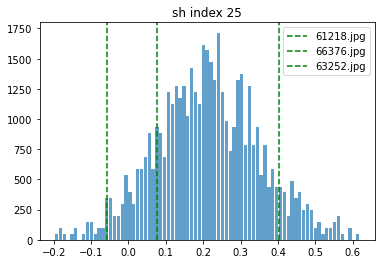

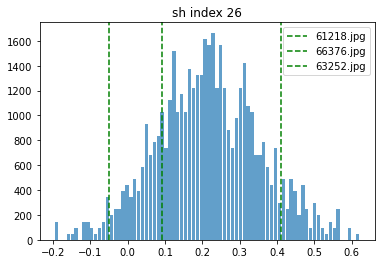

In [36]:
print(train_light_arr.shape)
print(test_light_arr.shape)
import matplotlib.pyplot as plt

vis_light = np.stack((test_light_dict['61218.jpg']['light'], test_light_dict['66376.jpg']['light'], test_light_dict['63252.jpg']['light']), axis=0)
vis_light_name = ['61218.jpg', '66376.jpg', '63252.jpg']
print(vis_light.shape)
for i in range(27):
    plt.hist(train_light_arr[:, i], bins='auto', alpha=0.7, rwidth=0.85)
    for j in range(len(vis_light)):
        plt.axvline(vis_light[j, i], color='g', linestyle='--', label=f'{vis_light_name[j]}')

    plt.title(f'sh index {i}')
    plt.legend()
    plt.show()




# Shadow